<a href="https://colab.research.google.com/github/Life-Line99/python-works/blob/master/writeup2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus
import graphviz as graphhviz
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import statsmodels.api as sm
import arrow
import matplotlib.pyplot as plt
s = pd.Series(list('Campaign Name'))

In [0]:
df = pd.read_csv('Travel Pony Facebook.csv')
df.head()

,Start Date,End Date,Account,Campaign Name,Reach,Frequency,Impressions,Clicks,Unique Clicks,Amount Spent (USD),Page Likes,Page Engagement,Post Engagement,Post Likes,Post Comments,Post Shares,Photo Views,Website Clicks,Cost per Page Like (USD),Cost per Page Engagement (USD)
0,2013-12-02,2013-12-02,Bob Jackson,Cyber Weekend,278117,2.314303,643647,336,313,300.00,3,246,243,0,0,0,0,243,100.00,1.219512
1,2013-12-01,2013-12-01,Bob Jackson,Cyber Weekend,221255,2.079090,460009,376,348,300.00,6,215,209,0,0,0,0,209,50.00,1.395349
2,2013-11-30,2013-11-30,Bob Jackson,Cyber Weekend,267915,2.499069,669538,383,345,300.00,2,252,250,0,0,0,0,250,150.00,1.190476
3,2013-11-29,2013-11-29,Bob Jackson,Cyber Weekend,280332,2.365406,663099,301,275,300.00,3,257,254,0,0,0,0,254,100.00,1.167315
4,2013-11-22,2013-11-22,Bob Jackson,TravelPony: General Ads,14269,1.000420,14275,64,61,35.18,2,14,12,0,0,0,0,12,17.59,2.512857


In [0]:
df2 = df.rename({'Amount Spent (USD)': 'Amount', 'Unique Clicks': 'Unique_Clicks', 'Page Likes':'Page_Likes', 
                 'Page Engagement':'Page_Engagement', 'Post Engagement':'Post_Engagement', 'Post Likes':'Post_Likes',
                 'Post Comments':'Post_Comments', 'Post Shares':'Post_Shares', 'Photo Views': 'Photo_Views', 
                 'Campaign Name':'Campaign_Name','Website Clicks':'Website_Clicks' }, axis=1)
df2

,Start Date,End Date,Account,Campaign_Name,Reach,Frequency,Impressions,Clicks,Unique_Clicks,Amount,Page_Likes,Page_Engagement,Post_Engagement,Post_Likes,Post_Comments,Post_Shares,Photo_Views,Website_Clicks,Cost per Page Like (USD),Cost per Page Engagement (USD)
0,2013-12-02,2013-12-02,Bob Jackson,Cyber Weekend,278117,2.314303,643647,336,313,300.00,3,246,243,0,0,0,0,243,100.000000,1.219512
1,2013-12-01,2013-12-01,Bob Jackson,Cyber Weekend,221255,2.079090,460009,376,348,300.00,6,215,209,0,0,0,0,209,50.000000,1.395349
2,2013-11-30,2013-11-30,Bob Jackson,Cyber Weekend,267915,2.499069,669538,383,345,300.00,2,252,250,0,0,0,0,250,150.000000,1.190476
3,2013-11-29,2013-11-29,Bob Jackson,Cyber Weekend,280332,2.365406,663099,301,275,300.00,3,257,254,0,0,0,0,254,100.000000,1.167315
4,2013-11-22,2013-11-22,Bob Jackson,TravelPony: General Ads,14269,1.000420,14275,64,61,35.18,2,14,12,0,0,0,0,12,17.590000,2.512857
5,2013-11-22,2013-11-22,Bob Jackson,TravelPony: Conversion Test,7096,1.018743,7229,32,32,45.01,2,5,3,0,0,0,0,3,22.505000,9.002000
6,2013-11-21,2013-11-21,Bob Jackson,TravelPony: Conversion Test,29437,1.000000,29437,100,80,200.00,10,43,33,0,0,0,0,33,20.000000,4.651163
7,2013-11-21,2013-11-21,Bob Jackson,TravelPony: General Ads,30320,1.018239,30873,178,157,98.09,5,50,45,0,0,0,0,45,19.618000,1.961800
8,2013-11-20,2013-11-20,Bob Jackson,TravelPony: Conversion Test,25951,1.026820,26647,133,113,200.00,8,50,42,0,0,0,0,42,25.000000,4.000000
9,2013-11-20,2013-11-20,Bob Jackson,TravelPony: General Ads,49038,1.000000,49038,324,276,178.77,13,112,99,0,0,0,0,99,13.751538,1.596161


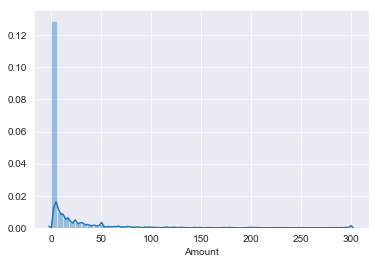

In [0]:
sns.set_style('darkgrid')
sns.distplot(df2["Amount"])

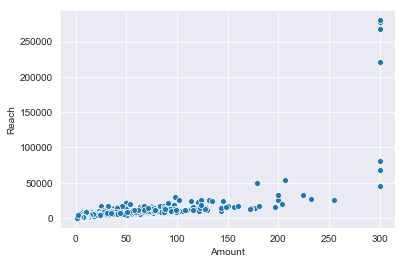

In [0]:
v = sns.scatterplot(x='Amount', y='Reach', data=df2)

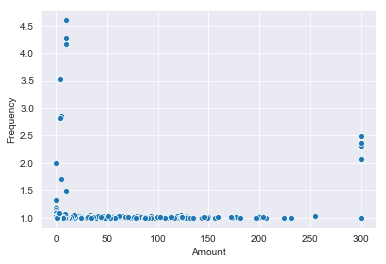

In [0]:
d = sns.scatterplot(x='Amount', y='Frequency', data=df2)

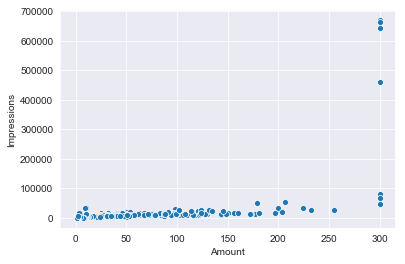

In [0]:
e = sns.scatterplot(x='Amount', y='Impressions', data=df2)

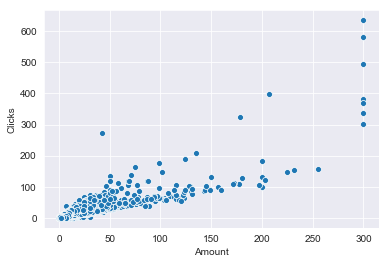

In [0]:
f = sns.scatterplot(x='Amount', y='Clicks', data=df2)

In [0]:

X = df2[["Reach", 
         "Impressions", 
         "Frequency", 
         "Clicks", 
         "Photo_Views",
         "Unique_Clicks",
         "Page_Likes",
         "Page_Engagement",
         "Post_Engagement",
         "Post_Likes",
         "Post_Comments",
         "Post_Shares",
         "Website_Clicks",
          "Campaign_Name"]]
y = df2["Amount"]
X = pd.get_dummies(data=X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Amount   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     140.8
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        19:56:32   Log-Likelihood:                -11387.
No. Observations:                3705   AIC:                         2.383e+04
Df Residuals:                    3177   BIC:                         2.711e+04
Df Model:                         527                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================================
                                                                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------
Reach                                                                         0.0029      0.000     25.294      0.000       0.003       0.003
Impressions                                                                  -0.0008   5.35e-05    -14.752      0.000      -0.001      -0.001
Frequency                                                                     5.7120      1.865      3.063      0.002       2.055       9.369
Clicks                                                                       -0.2388      0.074     -3.213      0.001      -0.385      -0.093
Photo_Views                                                                   2.2653      0.965      2.348      0.019       0.374       4.157
Unique_Clicks                                                                 0.4698      0.083      5.694      0.000       0.308       0.632
Page_Likes                                                                   16.6969      5.780      2.889      0.004       5.365      28.029
Page_Engagement                                                             -14.3074      5.776     -2.477      0.013     -25.633      -2.982
Post_Engagement                                                              12.2190      4.815      2.538      0.011       2.779      21.659
Post_Likes                                                                    1.7334      0.966      1.794      0.073      -0.161       3.628
Post_Comments                                                                 2.8861      1.010      2.857      0.004       0.906       4.867
Post_Shares                                                                   2.6967      0.987      2.733      0.006       0.762       4.632
Website_Clicks                                                                2.6374      0.964      2.735      0.006       0.746       4.529
Campaign_Name_Ad 1                                                           -6.4788      2.767     -2.341      0.019     -11.905      -1.053
Campaign_Name_Cyber Weekend                                                -204.7108     17.427    -11.747      0.000    -238.880    -170.541
Campaign_Name_Nanigans_2_637                                                 -4.9449      3.784     -1.307      0.191     -12.364       2.474
Campaign_Name_Nanigans_2_638                                                 -4.5469      3.393     -1.340      0.180     -11.199       2.105
Campaign_Name_Nanigans_2_639                                                 -5.6195      3.390     -1.658      0.098     -12.267       1.028
Campaign_Name_Nanigans_2_640                                                 -8.1226      3.399     -

In [0]:
WRIITEN ANSWERS.

In [0]:
Q1) Linear regression will not work in this problem. It could work for Amount spent and Clicks but they have also got outliers.
Q2,3) 
      1. campaign names(Campaign_Name_TravelPony: Conversion Test, Campaign_Name_Simple_Multi_Fill_Campaign_2_559)
       2.Page likes
       3. Post engagements